<a href="https://colab.research.google.com/github/junyoungg/mppi_cem_tutorial/blob/main/mppi_cem_tutorial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %pip install moviepy

In [2]:
# %cd /content/mppi_cem_tutorial
# !git pull
# %cd /content

In [3]:
import sys
import os
sys.path.append(os.path.abspath('src'))
sys.path.append(os.path.abspath('app'))

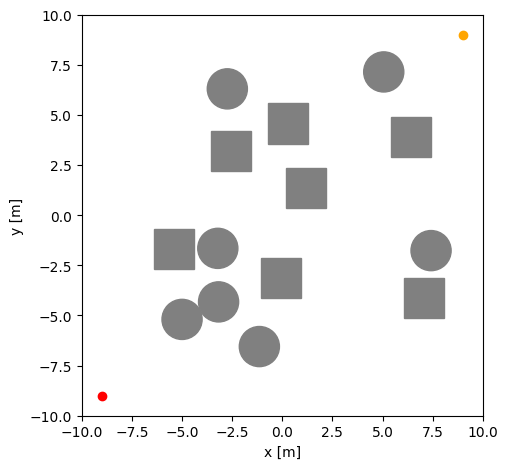

In [4]:
from envs.navigation_2d import Navigation2DEnv

env1 = Navigation2DEnv(v_min=0.0, v_max=2.0, omega_min=-1.0, omega_max=1.0, seed=2025)
env1.plot()

In [5]:
import torch

import navigation2d
from controller.mppi import MPPI
from controller.cem import CEM

mppi = MPPI(env=env1, horizon=15, num_samples=100, sigmas=torch.tensor([0.5, 0.5]), lambda_=1.0)
cem = CEM(env=env1, horizon=15, num_samples=100, sigmas=torch.tensor([0.5, 0.5]), iters=3, elite_ratio=0.1)

traj = navigation2d.main(env=env1, solver=cem, max_steps=200) # save trajectory for plot

Device: cpu
Device: cpu


recording video:   0%|          | 0/200 [00:00<?, ?it/s]

Goal Reached!
average solve time: 17.549 ms
MoviePy - Building file video/navigation_2d.gif with imageio.


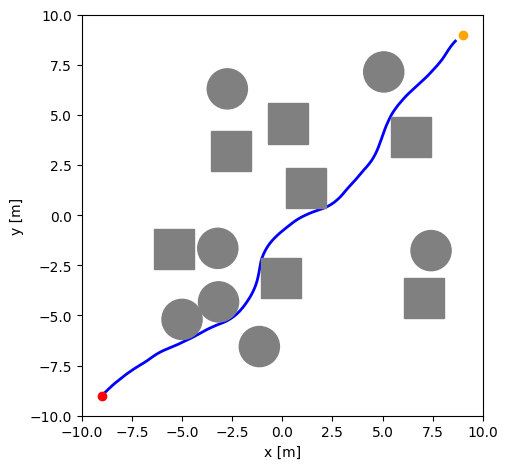

In [6]:
env1.plot()
env1._ax.plot(traj[:,0], traj[:,1], linewidth=2, color="blue")

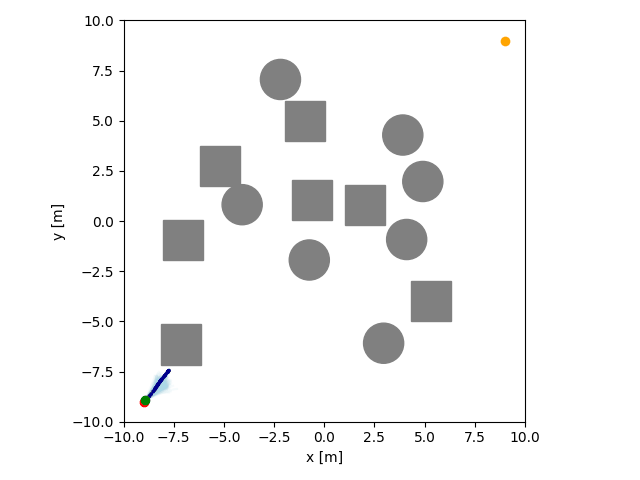

In [7]:
from IPython.display import Image

Image(filename='media/navigation_2d.gif')